# <center> Amrita Pudasaini <center>
The project performed in the week 8 of the course Python Programming with Data was about clustering the political campaign based on reach, funding and engagement. The project was based on the political campaign data collected from the 2017 and 2022 Nepalese election, how the funding, reach, and engagement were distributed across the parties and provinces. The project was to employ clustering algorithms such as K-Means and DBSCAN to analyze campaigns’ strategies and make broader predictions of future electoral movements. This project was completed by following the five steps: data collection, data handling, exploratory data analysis, model selection, model evaluation. 
#### The major findings from this project are:
These findings were of paramount significance for better understanding of political campaigns in Nepal, as revealed by the clustering analysis. For the 2017 general election, it showed that the distribution of funding was concentrated in the hands of a few main parties. This funding disparity was translated into the differences in the outreach and interactivity with the target audiences. With limited number of party funding scandals in the 2022 election, there was indication of better party balance in financial support and improved participation. The major parties with high funding and high level of participation, the upstart parties with moderate funding and moderate level of participation, and the minor parties with low funding and low levels of participation. The clustering also provided insight in the fact that some regions sustained higher values of correlation between funding and engagement, implying that regional strategies influence the success of a campaign.



# <center> Step 1: Data Collection and Load the Datasets <center>
The first process of the project was data collection from credible sources like the Election Commission of Nepal, Democracy Research Center, and Election Observation Committee Nepal. The data collected was based on the election of 2017 and 2022 in the provinces of Nepal constituting of seven provinces. They deployed features such as funding, reach, engagement, and votes regarding the major political parties like ( Nepali Congress, CPN-UML, CPN-Maoist Centre, Rastriya Prajatantra, JSP_Nepal). Due to a significant number of records, the averages for each province and political party were calculated to simplify the dataset, which formed a new DataFrame with the information combined to provide an easy analysis.

In [2]:
import pandas as pd

# Load the dataset from the Excel file
province_1 = pd.read_excel('data/Bagmati.xlsx')
province_2 = pd.read_excel('data/Gandaki.xlsx')
province_3 = pd.read_excel('data/Karnali.xlsx')
province_4 = pd.read_excel('data/Lumbini.xlsx')
province_5 = pd.read_excel('data/Koshi.xlsx')
province_6 = pd.read_excel('data/Madhesh.xlsx')
province_7 = pd.read_excel('data/Sudurpaschim.xlsx')

province_1.columns

Index(['Year', 'Party', 'Funding (NPR)', 'Reach', 'Engagement', 'Votes',
       'Campaign Events'],
      dtype='object')

## Main dataframe

In [ ]:
df = pd.DataFrame(columns=['Year','Party','Funding (NPR)','Reach','Engagement','Votes','Campaign Events'])

df[['Year','Party']] = province_1[['Year','Party']]

df.head(20) 

# Assuming province_1, province_2, ..., province_7 are already defined DataFrames.

# Loop through columns (2 to 6, as per your original range)
for j in range(2, 7):  # Assuming columns 2 to 6 have funding data in each DataFrame

    for i in range(len(province_1)):  # All the datasets have the same number of rows (11 rows)
        
        # Extract funding values for the current row from all datasets
        funding_values = [
            province_1.iloc[i, j],  # Funding value from province_1
            province_2.iloc[i, j],  
            province_3.iloc[i, j],  
            province_4.iloc[i, j],  
            province_5.iloc[i, j], 
            province_6.iloc[i, j],  
            province_7.iloc[i, j]   
        ]
        
        # Calculate the average funding for the current row
        average_funding = sum(funding_values) / len(funding_values)
        
        # Assign the average funding value to the respective column in the DataFrame
        df.iloc[i, j] = average_funding  # Set the value of the main dataset (df) at row i, column j

df.head(20)



,Year,Party,Funding (NPR),Reach,Engagement,Votes,Campaign Events
0,2017,Nepali Congress,42142857.142857,2500000.0,400000.0,850000.0,110.0
1,2017,CPN-UML,39000000.0,2300000.0,362857.142857,921428.571429,100.0
2,2017,CPN-Maoist Centre,29857142.857143,1800000.0,300000.0,657142.857143,88.571429
3,2017,Rastriya Prajatantra,22142857.142857,1271428.571429,210000.0,400000.0,72.857143
4,2017,JSP-Nepal,17571428.571429,1014285.714286,167142.857143,300000.0,62.857143
5,2022,Nepali Congress,47142857.142857,2771428.571429,440000.0,935714.285714,120.0
6,2022,CPN-UML,42285714.285714,2557142.857143,400000.0,1007142.857143,110.0
7,2022,CPN-Maoist Centre,34000000.0,2014285.714286,331428.571429,728571.428571,98.571429
8,2022,Rastriya Prajatantra,25285714.285714,1428571.428571,234285.714286,471428.571429,80.0
9,2022,JSP-Nepal,19571428.571429,1157142.857143,185714.285714,342857.142857,70.0


## Exporting Data

In [4]:
df.to_excel('data/Cleaned_data.xlsx')

# <center> Step 2: Handle Missing Values, Duplicates and Incosistencies <center>
After the data was collected, the next process was data cleaning. Data quality was ensured by paying close attention to remove duplicate records in the collected dataset. Also, data for missing values were detected and properly dealt with. The missing values were handled as follows; they were replaced by the mean or median of the associated columns. This made the data valid and accurate while making sure it was usable for further analysis while avoiding any possbile data manipulation.

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Year               0
Party              0
Funding (NPR)      0
Reach              0
Engagement         0
Votes              0
Campaign Events    0
dtype: int64


In [6]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of Duplicates: {duplicates}")

Number of Duplicates: 0


# <center> Step 3: Exploratory Data Analysis <center>
### <center> Scatter Plot <center>
### <center> Histogram <center>
### <center> Piechart <center>
### <center> Bar Graph <center>
Exploratory Data Analysis (EDA) were carried out to ascertain the central tendencies and distribution in funding, number of units of reach, engagement, and votes. Histograms were used to present distribution, scatter plots to determine correlation and absolute frequency, pie charts and bar charts for the comparison of values in years and parties. The EDA was useful in understanding trends, outliers or patterns in the data that provided some background as to how the factors in the campaigns in Nepalese politics.

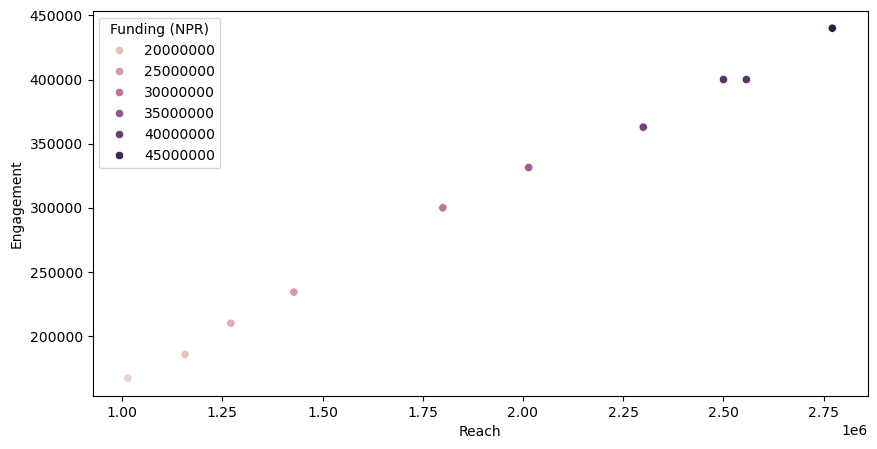

In [7]:
# Scatter Plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Reach'], y=df['Engagement'], hue=df['Funding (NPR)'])
plt.show()

Reach            object
Engagement       object
Funding (NPR)    object
dtype: object
Reach            0
Engagement       0
Funding (NPR)    0
dtype: int64


<Figure size 800x600 with 0 Axes>

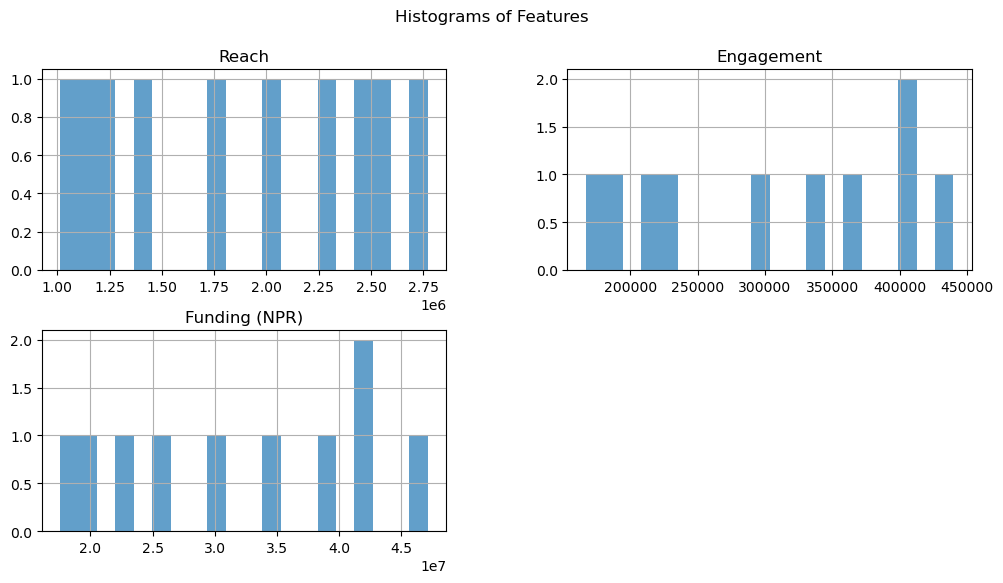

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check data types
print(df[['Reach', 'Engagement', 'Funding (NPR)']].dtypes)

# Check for missing values
print(df[['Reach', 'Engagement', 'Funding (NPR)']].isnull().sum())

# Convert non-numeric data to numeric
df['Reach'] = pd.to_numeric(df['Reach'], errors='coerce')
df['Engagement'] = pd.to_numeric(df['Engagement'], errors='coerce')
df['Funding (NPR)'] = pd.to_numeric(df['Funding (NPR)'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Plot histograms
plt.figure(figsize=(8, 6))
df[['Reach', 'Engagement', 'Funding (NPR)']].hist(bins=20, alpha=0.7, figsize=(12, 6))
plt.suptitle("Histograms of Features")
plt.show()

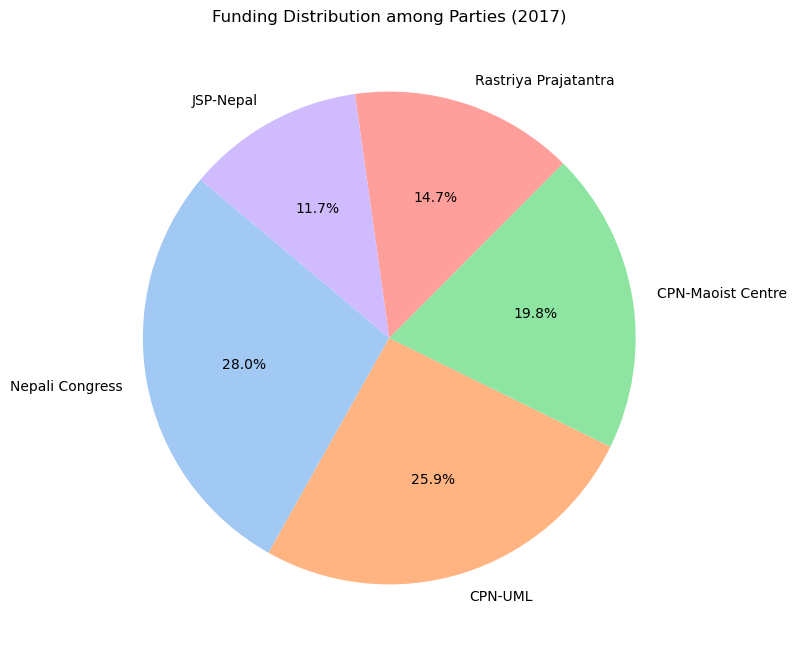

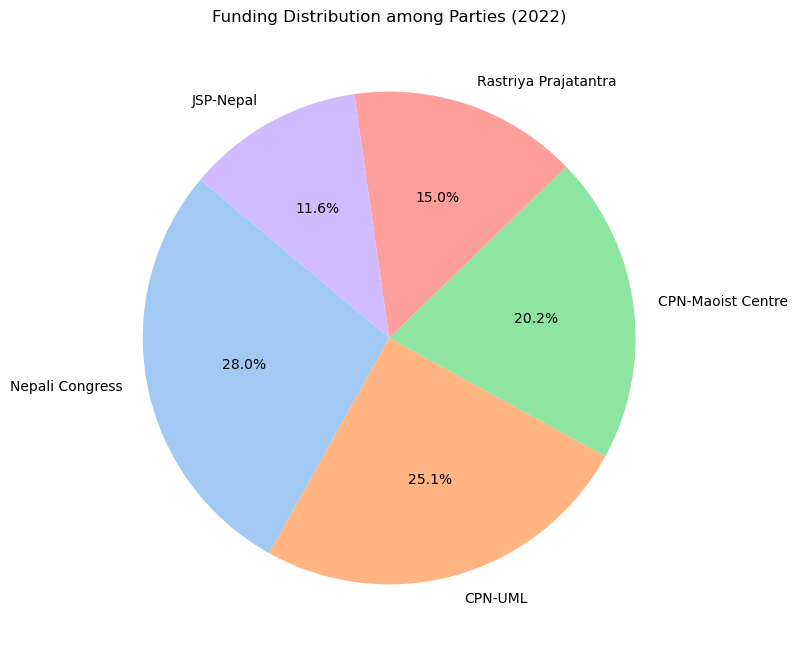

C:\Users\pudas\AppData\Local\Temp\ipykernel_9032\1304659531.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y=column, data=data, palette='viridis')


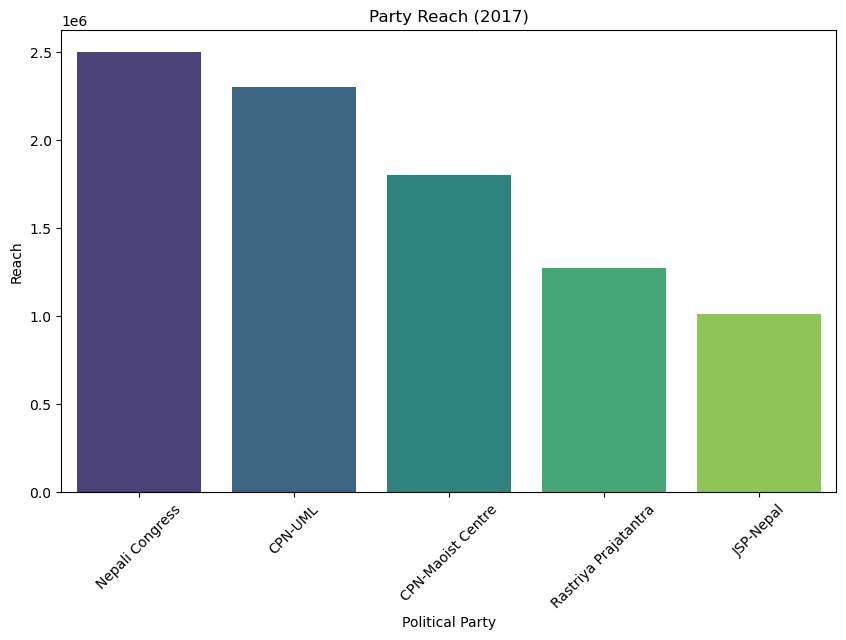

C:\Users\pudas\AppData\Local\Temp\ipykernel_9032\1304659531.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y=column, data=data, palette='viridis')


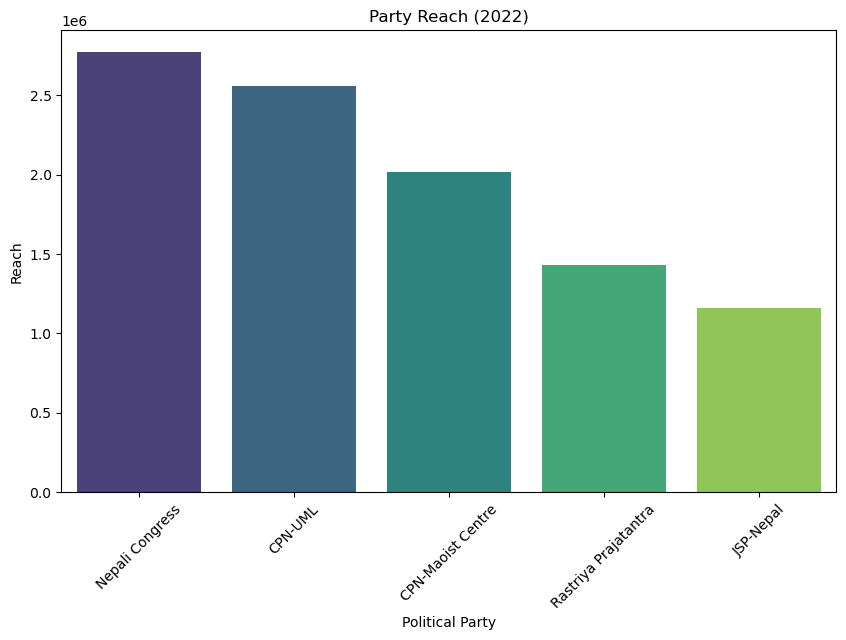

C:\Users\pudas\AppData\Local\Temp\ipykernel_9032\1304659531.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y=column, data=data, palette='viridis')


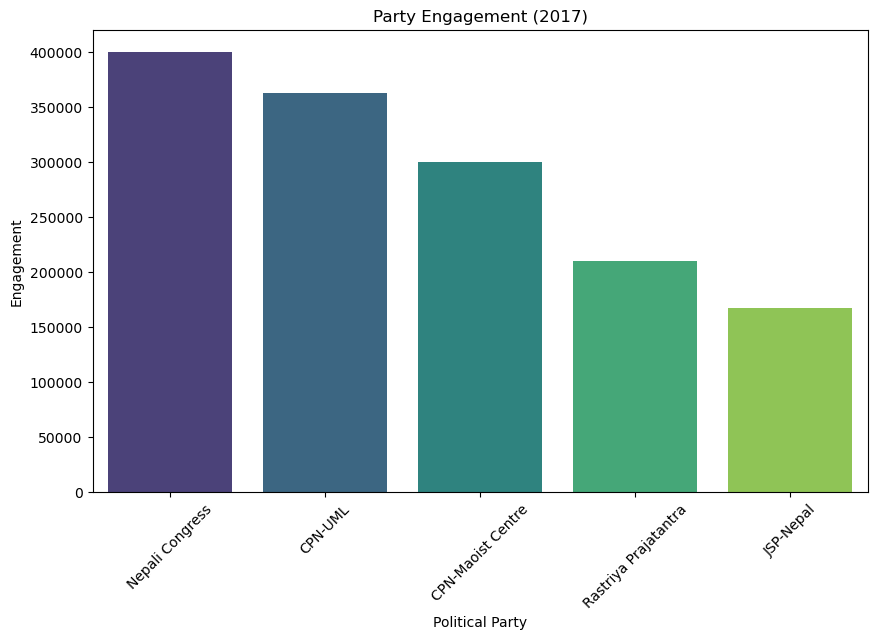

C:\Users\pudas\AppData\Local\Temp\ipykernel_9032\1304659531.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y=column, data=data, palette='viridis')


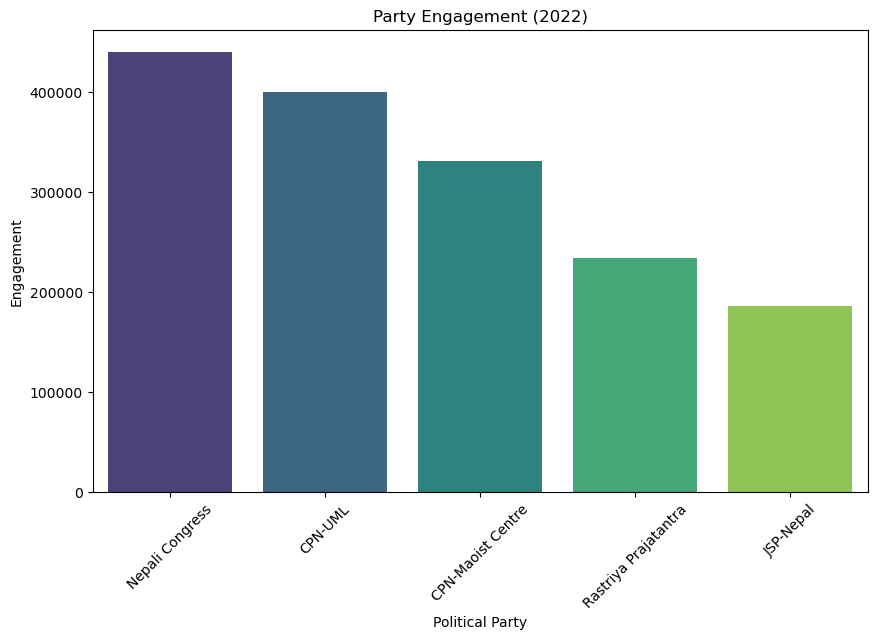

C:\Users\pudas\AppData\Local\Temp\ipykernel_9032\1304659531.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y=column, data=data, palette='viridis')


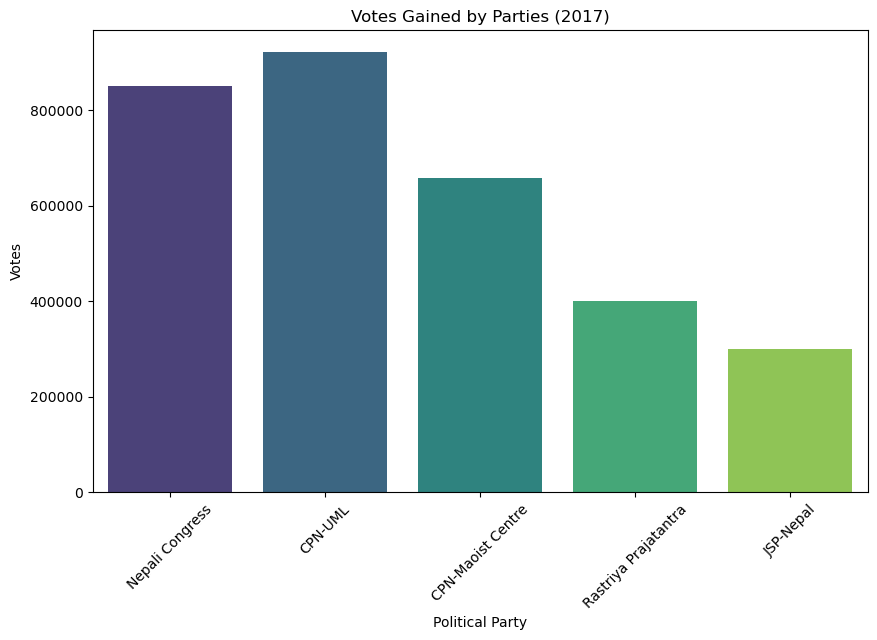

C:\Users\pudas\AppData\Local\Temp\ipykernel_9032\1304659531.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y=column, data=data, palette='viridis')


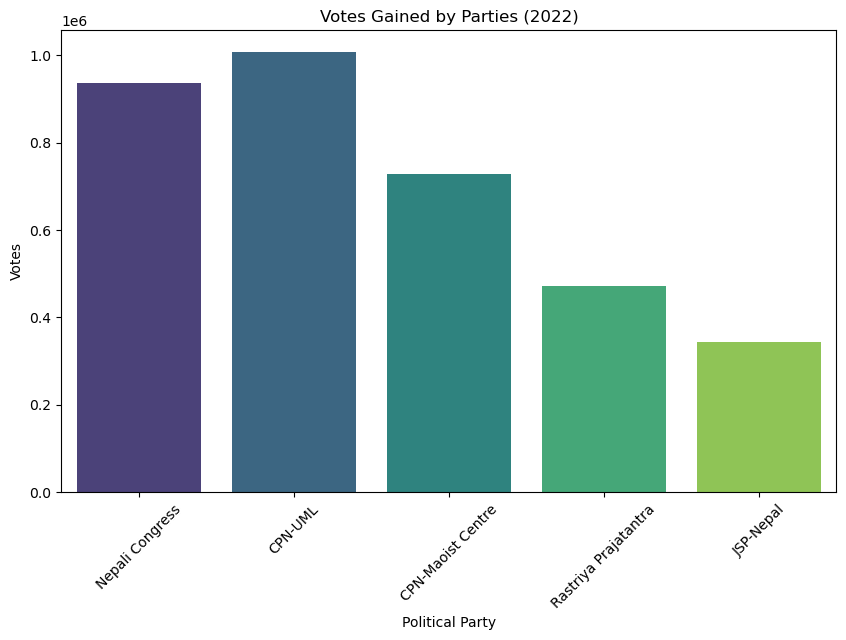

C:\Users\pudas\AppData\Local\Temp\ipykernel_9032\1304659531.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y=column, data=data, palette='viridis')


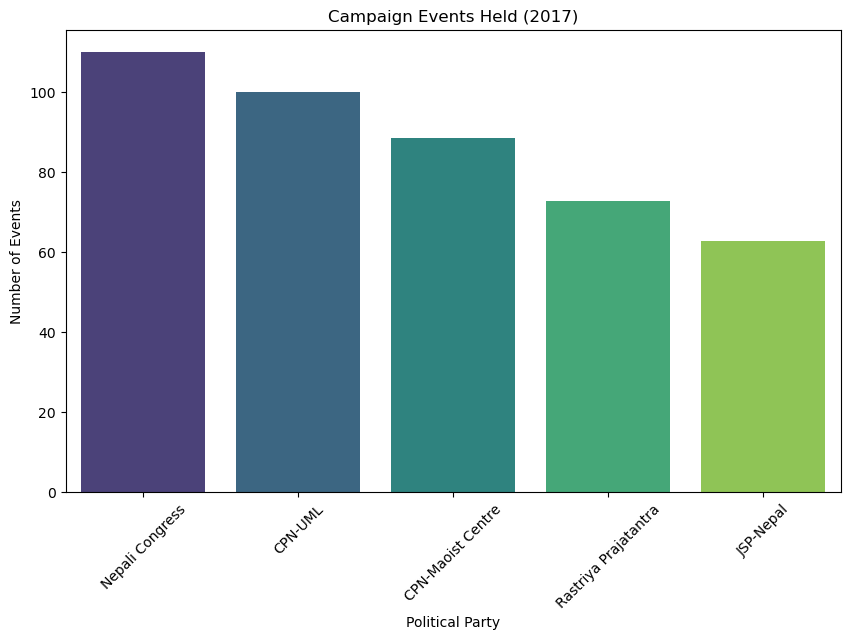

C:\Users\pudas\AppData\Local\Temp\ipykernel_9032\1304659531.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y=column, data=data, palette='viridis')


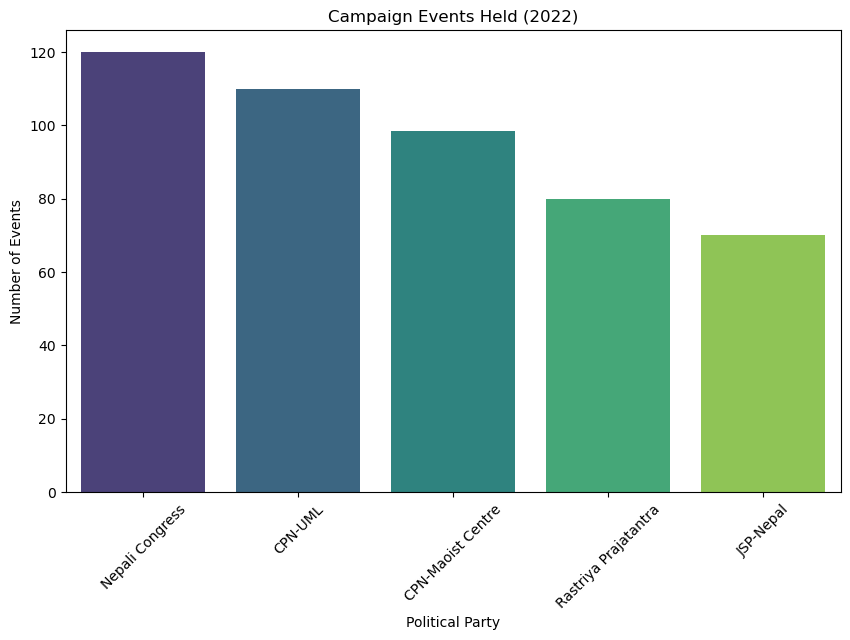

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('data/Cleaned_data.xlsx')

# Separate data for 2017 and 2022
data_2017 = data[data['Year'] == 2017]
data_2022 = data[data['Year'] == 2022]

def create_pie_chart(data, column, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data[column], labels=data['Party'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title(title)
    plt.show()


def create_bar_plot(data, column, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Party', y=column, data=data, palette='viridis')
    plt.title(title)
    plt.xlabel('Political Party')
    plt.ylabel(xlabel)
    plt.xticks(rotation=45)
    plt.show()


create_pie_chart(data_2017, 'Funding (NPR)', 'Funding Distribution among Parties (2017)')
create_pie_chart(data_2022, 'Funding (NPR)', 'Funding Distribution among Parties (2022)')

create_bar_plot(data_2017, 'Reach', 'Party Reach (2017)', 'Reach')
create_bar_plot(data_2022, 'Reach', 'Party Reach (2022)', 'Reach')

create_bar_plot(data_2017, 'Engagement', 'Party Engagement (2017)', 'Engagement')
create_bar_plot(data_2022, 'Engagement', 'Party Engagement (2022)', 'Engagement')

create_bar_plot(data_2017, 'Votes', 'Votes Gained by Parties (2017)', 'Votes')
create_bar_plot(data_2022, 'Votes', 'Votes Gained by Parties (2022)', 'Votes')

create_bar_plot(data_2017, 'Campaign Events', 'Campaign Events Held (2017)', 'Number of Events')
create_bar_plot(data_2022, 'Campaign Events', 'Campaign Events Held (2022)', 'Number of Events')


### Split Train/Test and Normalize Data

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, x_train, y_test = train_test_split(df[['Reach', 'Engagement']], df[['Funding (NPR)']], test_size=0.33, random_state=0)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

# <center> Step 4: Model Selection <center>
### <center> K-Means Clustering <center>
### <center> DBSCAN (Density-Based Spatial Clustering of Applications with Noise) <center>
The core analysis was to use clustering techniques to categorize the political campaigns. Data was first preprocessed by dividing into training and testing sets and normalization. K-Means clustering model was employed, in which the ‘elbow’ methodology was used to find out the appropriate number of clusters, and the DBSCAN algorithm was employed to detect density-based clusters. These clustering techniques enabled the categorization of the campaigns by their characteristics in funding, reach and engagement.

## K-Means Clustering using elbow method

c:\Users\pudas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pudas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pudas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pudas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

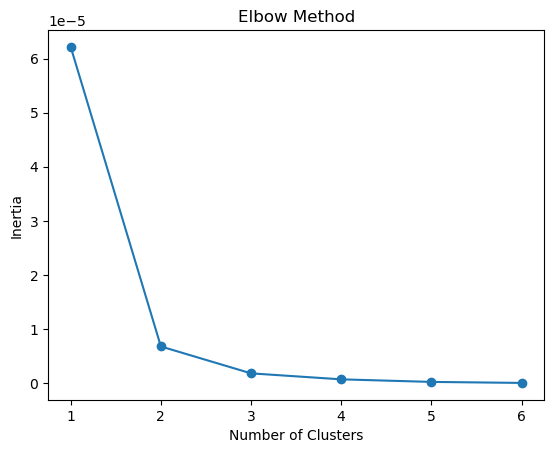

c:\Users\pudas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


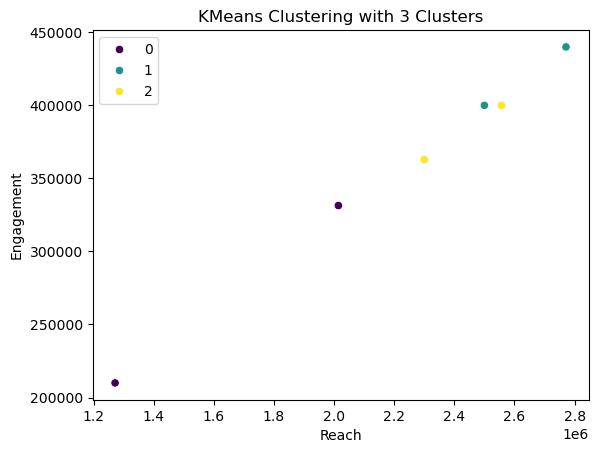

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

n_samples = X_train_norm.shape[0]

# Adjust the range of clusters to test
max_clusters = min(10, n_samples) 
inertia = []

# Elbow method
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X_train_norm)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Optimal number of clusters by choosing from elbow point
optimal_clusters = 3 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0, n_init='auto')
kmeans.fit(X_train_norm)

# Plot the clustered data
sns.scatterplot(x=X_train['Reach'], y=X_train['Engagement'], hue=kmeans.labels_, palette='viridis')
plt.title(f"KMeans Clustering with {optimal_clusters} Clusters")
plt.show()


# DBSCAN Clustering

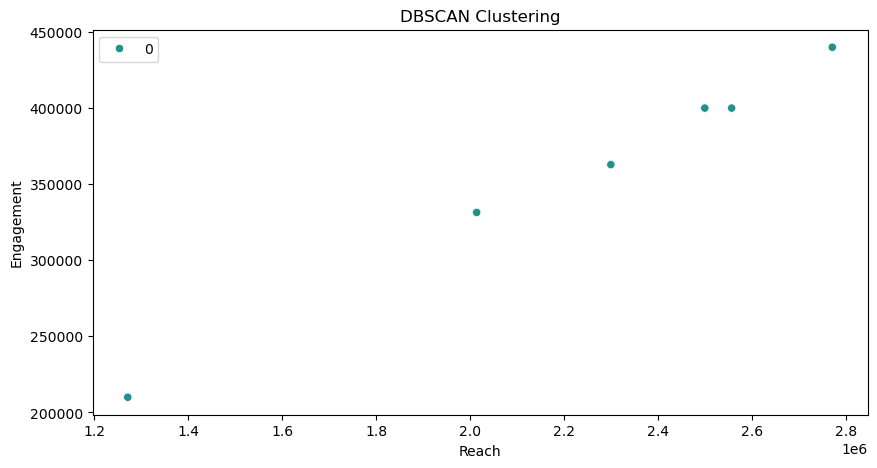

In [26]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train_norm)

# Create a scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_train['Reach'], y=X_train['Engagement'], hue=dbscan_labels, palette='viridis', legend='full')
plt.title('DBSCAN Clustering')
plt.show()

# <center> Step 5: Model Evaluation <center>
### <center> Silhouette Score <center> 
### <center> Davies-Bouldin Index <center>
The two most commonly used cluster validity indices in the field of pattern recognition are namely the Silhouette Score and the Davies-Bouldin Index. The Silhouette Score informed the degree of similarity from each data point to other clusters which helped determine the cohesion and separation of clusters. A higher silhouette value indicates that clusters formed are compact. The Davies-Bouldin Index of clustering performance calculated the average with regards to the similarity ratio of the cluster set to the spread of other clusters and more positive value indicated better clustering. These evaluations showed that clustering algorithm was efficient and that it could identify different patterns in political campaigns.

### Silhouette Score

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.5535168752603629

### Davies-Bouldin Index

In [17]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Score for K-Means
kmeans_davies_bouldin = davies_bouldin_score(X_train_norm, kmeans.labels_)
print(f"K-Means Davies-Bouldin Score: {kmeans_davies_bouldin}")




K-Means Davies-Bouldin Score: 0.43237223945326936


The above findings have lead us to conclude that upcoming elections will more likely record’s active contribution by the minor political parties, under influence of social media and enhanced voters’ turnout. Furthermore, uneven distribution of financial support and activities will remain an essential factor regarding local campaigning approaches relevant to provincial demands.